### 폰트 불러오기

In [ ]:
install.packages("extrafont")
library(extrafont)
system("sudo apt-get install fonts-nanum-coding")
font_import(pattern = "Nanum") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’


Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf' '/tmp/RtmpYFGWjM/fonts/NanumGothicCoding-Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf' '/tmp/RtmpYFGWjM/fonts/NanumGothicCoding' 2>&1' had status 139”
 : No FontName. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /usr/local/lib/R/site-library/extrafontdb/metrics



### 데이터 불러오기 및 처리

In [1]:
# https://drive.google.com/file/d/1mCgN3wvFQviqRJ5D7GG4xVk7EY6rgisN/view?usp=sharing : measuring
# https://drive.google.com/file/d/1X0lHC4_x3mP3nR-umZL0YNiyMWoUPhdz/view?usp=sharing : prscrptn
system("gdown --id 1mCgN3wvFQviqRJ5D7GG4xVk7EY6rgisN")
system("gdown --id 1X0lHC4_x3mP3nR-umZL0YNiyMWoUPhdz")
system("ls", TRUE)

[1] "Collect_measure.csv"  "Collect_prscrptn.csv" "sample_data"

In [2]:
measure <- read.csv("/content/Collect_measure.csv")
prscrptn<- read.csv("/content/Collect_prscrptn.csv")

In [3]:
remotes::install_github("davidsjoberg/ggsankey")

vctrs (0.5.0 -> 0.5.1) [CRAN]


Installing 1 packages: vctrs

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmpg8V4fX/remotes4b67310490/davidsjoberg-ggsankey-be08dd0/DESCRIPTION’ ... OK
* preparing ‘ggsankey’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ggsankey_0.0.99999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("xlsx")
library(xlsx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’




In [5]:
library(ggplot2)

In [6]:
install.packages(c('ggalluvial','stringr', 'dplyr', 'tidyr', 'reshape2', 'ggplot2'))
library(dplyr)
library(stringr)
library(tidyr)
options(repr.plot.width=19, repr.plot.height=13)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘plyr’, ‘Rcpp’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




##### 사전운동, 본운동, 마무리운동을 구분

In [7]:
g <- prscrptn %>% select(CNTER_NM, MESURE_PLACE_FLAG_NM, MESURE_AGE_CO, SEXDSTN_FLAG_CD, TROBL_TY_NM, TROBL_GRAD_NM, MVM_PRSCRPTN_CN) %>% data.frame()

g_ <- g %>% mutate(사전운동 = g$MVM_PRSCRPTN_CN %>% strsplit("/") %>% sapply('[',1), 
                   본운동 = g$MVM_PRSCRPTN_CN %>% strsplit("/") %>% sapply('[',2),
                   마무리운동 = g$MVM_PRSCRPTN_CN %>% strsplit("/") %>% sapply('[',3))

g_$마무리운동 <- ifelse(str_detect(g_$사전운동, "^마무리운동"), g_$사전운동, ifelse(str_detect(g_$본운동, "^마무리운동"), gsub("마무리운동:", "", g_$본운동), gsub("마무리운동:","",g_$마무리운동)))

g_$본운동 <- ifelse(str_detect(g_$사전운동, "^본운동"),gsub("본운동:", "", g_$사전운동), ifelse(str_detect(g_$본운동, "^본운동"),gsub("본운동:","",g_$본운동) , NA))

g_$사전운동 <- ifelse(str_detect(g_$사전운동, "^사전운동"), gsub("사전운동:","",g_$사전운동), NA)

g_$마무리운동<-gsub("마무리운동:", "", g_$본운동)

In [8]:
head(g_)

,CNTER_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,SEXDSTN_FLAG_CD,TROBL_TY_NM,TROBL_GRAD_NM,MVM_PRSCRPTN_CN,사전운동,본운동,마무리운동
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,대전,출장,37,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기,앉아서 다리 밀기,앉아서 다리 모으기,앉아서 다리 모으기
2,대전,출장,25,M,지적장애,2등급,사전운동:앉아서 다리 밀기/마무리운동:앉아서 다리 굽히기,앉아서 다리 밀기,NA,NA
3,대전,출장,50,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기/마무리운동:앉아서 다리 굽히기,앉아서 다리 밀기,앉아서 다리 모으기,앉아서 다리 모으기
4,대전,출장,25,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기,앉아서 다리 밀기,앉아서 다리 모으기,앉아서 다리 모으기
5,대전,출장,28,M,지적장애,1등급,사전운동:앉아서 다리 펴기/본운동:앉아서 다리 모으기,앉아서 다리 펴기,앉아서 다리 모으기,앉아서 다리 모으기
6,대전,출장,24,M,지적장애,1등급,"사전운동:앉아서 다리 펴기,앉아서 다리 밀기,실내 자전거타기","앉아서 다리 펴기,앉아서 다리 밀기,실내 자전거타기",NA,NA


In [9]:
### long form data
# 사전운동
g1 <- g_ %>% mutate(ID = row_number()) %>% select(ID,사전운동) %>% separate_rows(사전운동, sep= ",")%>% rename(운동이름 = 사전운동)%>%na.omit()
g1$운동구분 <- "사전운동"

# 본운동
g2 <- g_ %>% mutate(ID = row_number()) %>% select(ID,본운동) %>% separate_rows(본운동, sep= ",")%>% rename(운동이름 = 본운동)%>%na.omit()
g2$운동구분 <- "본운동"

# 마무리운동
g3 <- g_ %>% mutate(ID = row_number()) %>% select(ID,마무리운동) %>% separate_rows(마무리운동, sep= ",")%>% rename(운동이름 = 마무리운동)%>%na.omit()
g3$운동구분 <- "마무리운동"

ACCTO_운동 <- rbind(g1,rbind(g2,g3))
g$ID <- prscrptn$X+1
ACCTO_합 <- merge(g, ACCTO_운동, by="ID")
head(ACCTO_합)

,ID,CNTER_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,SEXDSTN_FLAG_CD,TROBL_TY_NM,TROBL_GRAD_NM,MVM_PRSCRPTN_CN,운동이름,운동구분
,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,대전,출장,37,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기,앉아서 다리 밀기,사전운동
2,1,대전,출장,37,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기,앉아서 다리 모으기,본운동
3,1,대전,출장,37,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기,앉아서 다리 모으기,마무리운동
4,2,대전,출장,25,M,지적장애,2등급,사전운동:앉아서 다리 밀기/마무리운동:앉아서 다리 굽히기,앉아서 다리 밀기,사전운동
5,3,대전,출장,50,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기/마무리운동:앉아서 다리 굽히기,앉아서 다리 모으기,본운동
6,3,대전,출장,50,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기/마무리운동:앉아서 다리 굽히기,앉아서 다리 모으기,마무리운동


In [10]:
# 나이대
ACCTO_합$MESURE_AGE_CO <- ifelse(ACCTO_합$MESURE_AGE_CO >= 89, "90대", ifelse(ACCTO_합$MESURE_AGE_CO >= 79, "80대", ifelse(ACCTO_합$MESURE_AGE_CO >= 69, "70대", ifelse(ACCTO_합$MESURE_AGE_CO >= 59, "60대", ifelse(ACCTO_합$MESURE_AGE_CO >= 49, "50대", ifelse(ACCTO_합$MESURE_AGE_CO >= 39, "40대", ifelse(ACCTO_합$MESURE_AGE_CO >= 29, "30대", ifelse(ACCTO_합$MESURE_AGE_CO >= 19, "20대", "10대"))))))))

### 통계

- 장애 유형

In [ ]:
prscrptn%>%group_by(TROBL_TY_NM) %>% summarise(n = n()) %>% mutate(pct = n/sum(n)*100)

TROBL_TY_NM,n,pct
<chr>,<int>,<dbl>
시각장애,203,6.812081
지적장애,2463,82.651007
척수장애,211,7.080537
청각장애,103,3.456376


In [ ]:
ACCTO_합%>%group_by(MESURE_AGE_CO) %>% summarise(n = n()) %>% mutate(pct = n/sum(n)*100)

MESURE_AGE_CO,n,pct
<chr>,<int>,<dbl>
10대,862,14.93675273
20대,2024,35.07191128
30대,1134,19.64997401
40대,687,11.90434933
50대,537,9.30514642
60대,366,6.34205510
70대,112,1.94073817
80대,45,0.77976087
90대,4,0.06931208


In [12]:
s<-prscrptn%>%group_by(TROBL_TY_NM,TROBL_GRAD_NM) %>% summarise(n = n()) %>% mutate(pct = n/sum(n)*100);s

`summarise()` has grouped output by 'TROBL_TY_NM'. You can override using the
`.groups` argument.


TROBL_TY_NM,TROBL_GRAD_NM,n,pct
<chr>,<chr>,<int>,<dbl>
시각장애,1등급,171,84.236453
시각장애,2등급,4,1.970443
시각장애,3등급,11,5.418719
시각장애,4등급,5,2.463054
시각장애,6등급,12,5.911330
지적장애,1등급,1236,50.182704
지적장애,2등급,717,29.110840
지적장애,3등급,510,20.706456
척수장애,불완전 마비,183,86.729858


In [13]:
ACCTO_합%>%group_by(운동구분) %>% summarise(n = n()) %>% mutate(pct = n/sum(n)*100)


운동구분,n,pct
<chr>,<int>,<dbl>
마무리운동,1982,34.34413
본운동,1982,34.34413
사전운동,1807,31.31173


In [ ]:
s<-ACCTO_합%>%group_by(TROBL_TY_NM,TROBL_GRAD_NM) %>% summarise(n = n()) %>% mutate(pct = n/sum(n)*100);s

#s$label <- paste0()

`summarise()` has grouped output by 'TROBL_TY_NM'. You can override using the
`.groups` argument.


TROBL_TY_NM,TROBL_GRAD_NM,n,pct
<chr>,<chr>,<int>,<dbl>
시각장애,1등급,326,85.564304
시각장애,2등급,7,1.837270
시각장애,3등급,19,4.986877
시각장애,4등급,11,2.887139
시각장애,6등급,18,4.724409
지적장애,1등급,2497,50.597771
지적장애,2등급,1297,26.281662
지적장애,3등급,1141,23.120567
척수장애,불완전 마비,211,86.475410


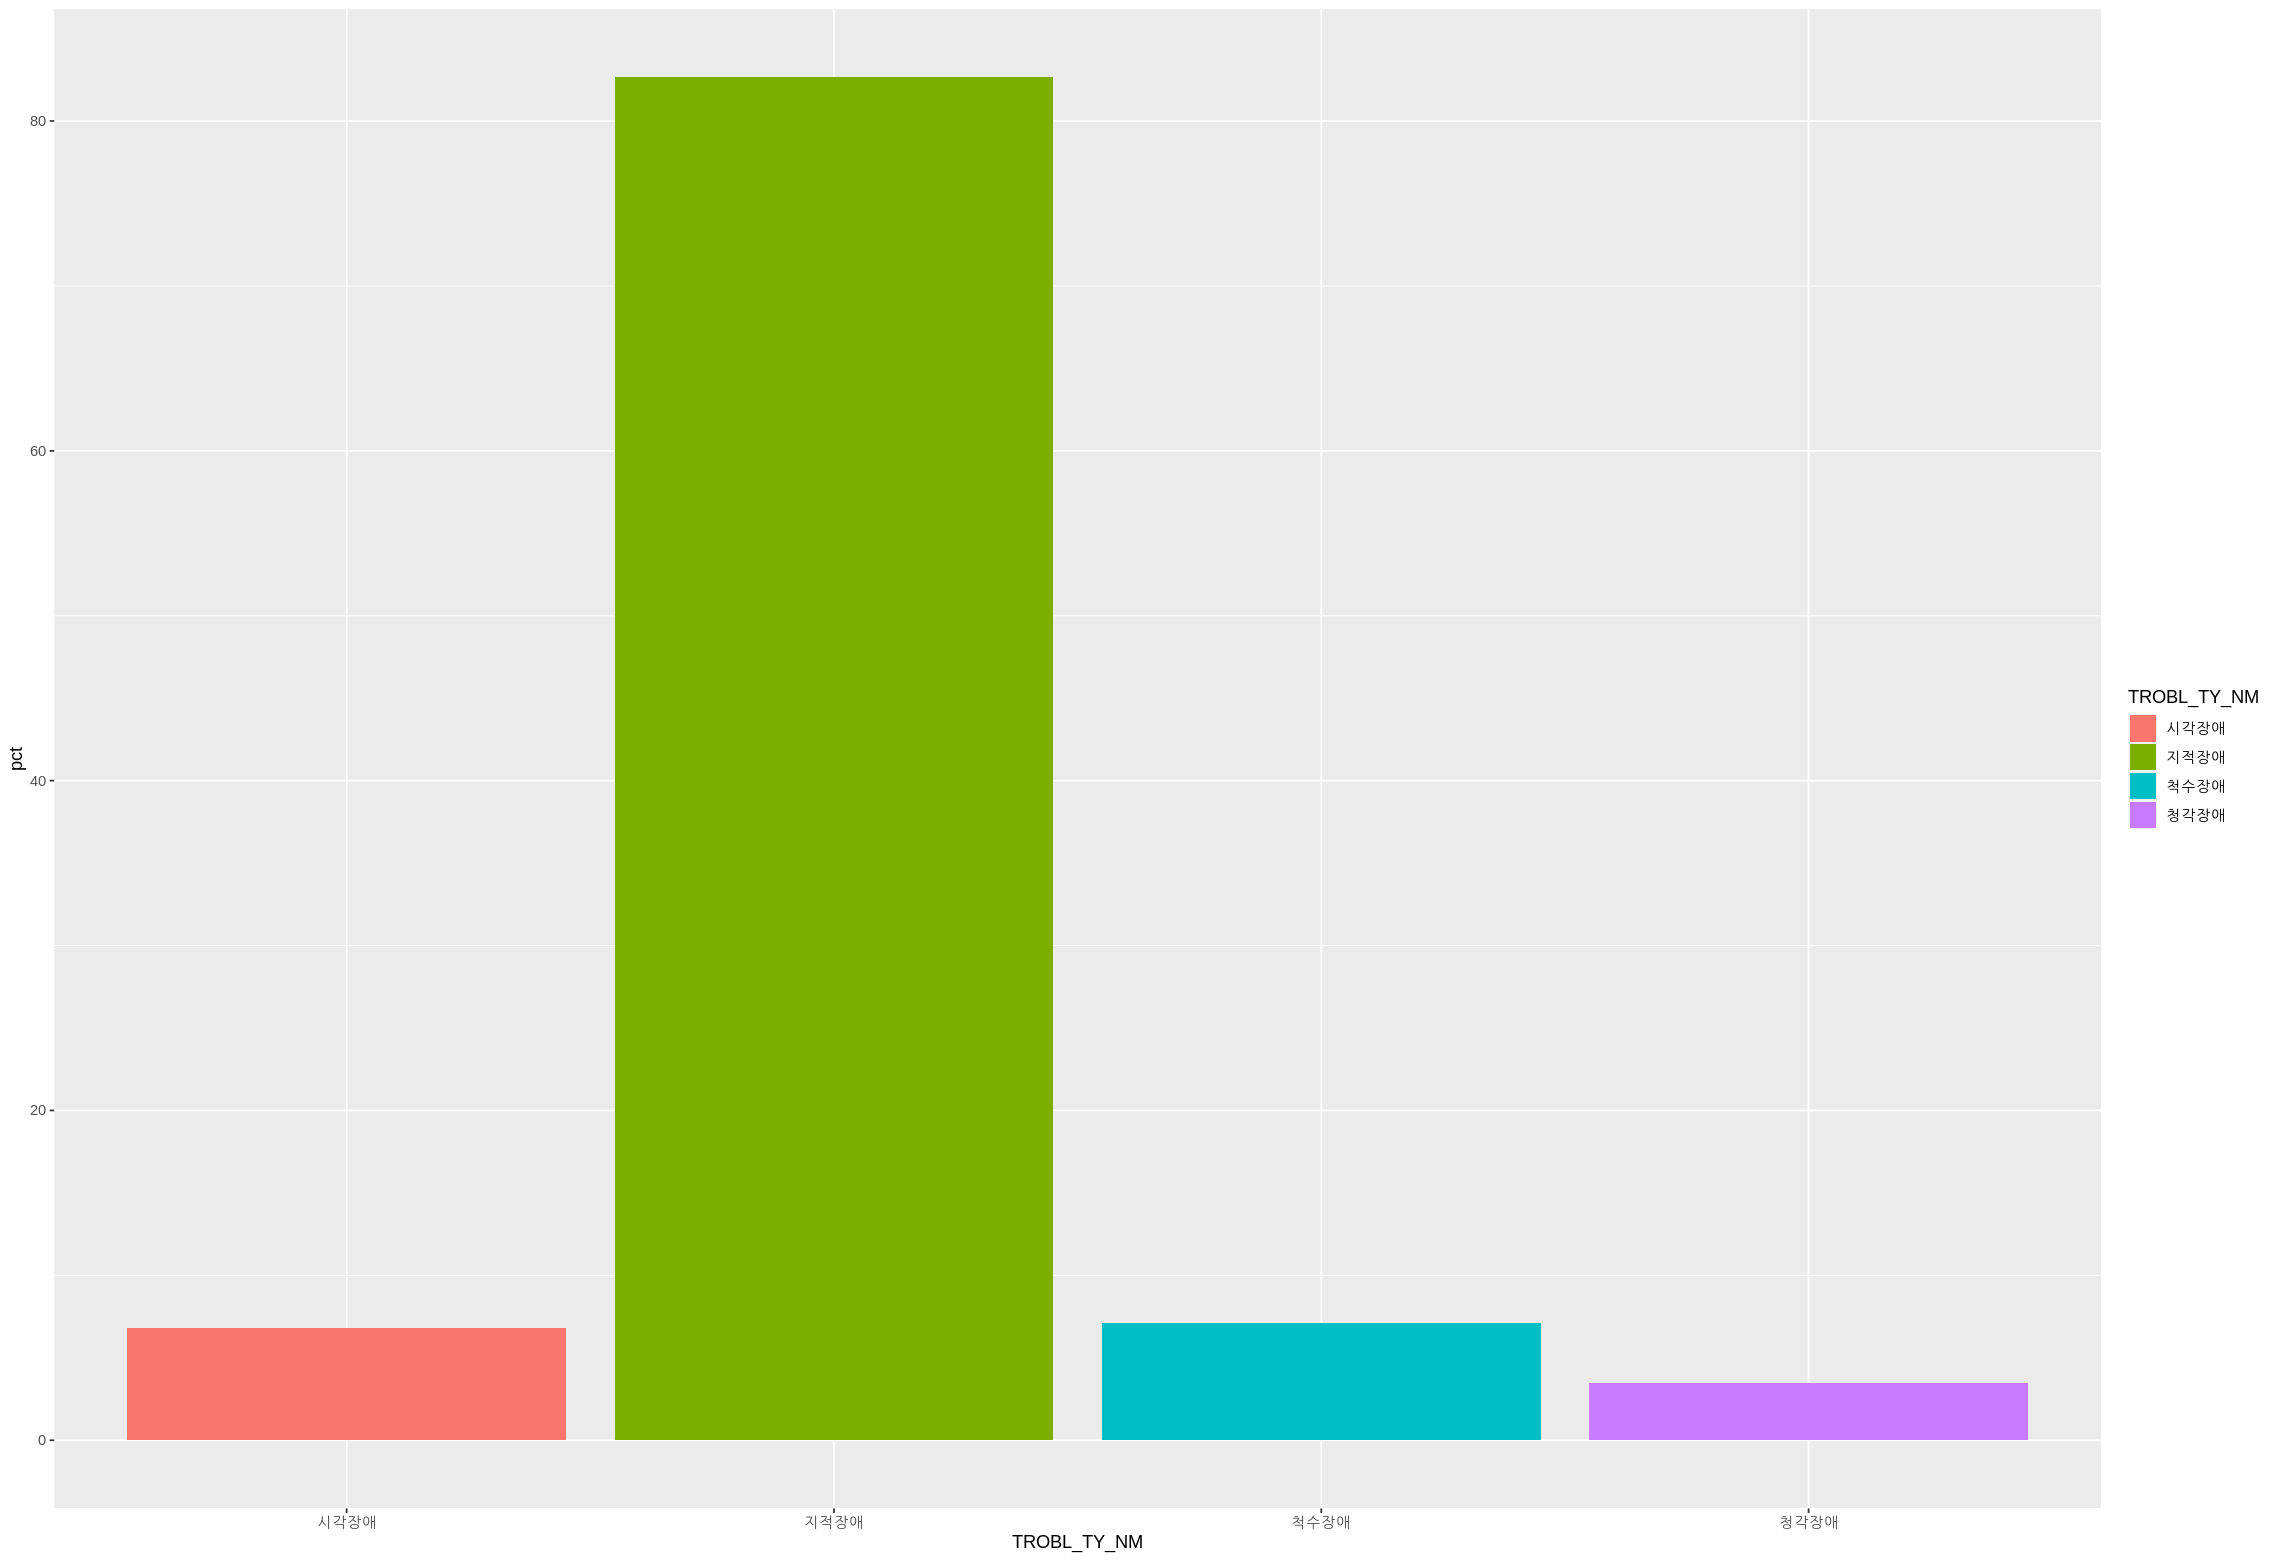

In [ ]:
s<-prscrptn%>%group_by(TROBL_TY_NM) %>% summarise(n = n()) %>% mutate(pct = n/sum(n)*100)
ggplot()+geom_bar(s,mapping = aes(x =TROBL_TY_NM,y = pct, fill = TROBL_TY_NM),stat = "identity") 

https://rpubs.com/cardiomoon/179268

In [ ]:
str(ACCTO_합)

'data.frame':	5771 obs. of  10 variables:
 $ ID                  : num  1 1 1 2 3 3 3 4 4 4 ...
 $ CNTER_NM            : chr  "대전" "대전" "대전" "대전" ...
 $ MESURE_PLACE_FLAG_NM: chr  "출장" "출장" "출장" "출장" ...
 $ MESURE_AGE_CO       : chr  "30대" "30대" "30대" "20대" ...
 $ SEXDSTN_FLAG_CD     : chr  "M" "M" "M" "M" ...
 $ TROBL_TY_NM         : chr  "지적장애" "지적장애" "지적장애" "지적장애" ...
 $ TROBL_GRAD_NM       : chr  "2등급" "2등급" "2등급" "2등급" ...
 $ MVM_PRSCRPTN_CN     : chr  "사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기" "사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기" "사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기" "사전운동:앉아서 다리 밀기/마무리운동:앉아서 다리 굽히기" ...
 $ 운동이름            : chr  "앉아서 다리 밀기" "앉아서 다리 모으기" "앉아서 다리 모으기" "앉아서 다리 밀기" ...
 $ 운동구분            : chr  "사전운동" "본운동" "마무리운동" "사전운동" ...


- 카이제곱


나이대 운동이름

In [ ]:
chisq.test(ACCTO_합$MESURE_AGE_CO, ACCTO_합$운동이름)

Warning message in chisq.test(ACCTO_합$MESURE_AGE_CO, ACCTO_합$운동이름):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  ACCTO_합$MESURE_AGE_CO and ACCTO_합$운동이름
X-squared = 778.54, df = 192, p-value < 2.2e-16


성별 운동이름

In [ ]:
chisq.test(ACCTO_합$SEXDSTN_FLAG_CD, ACCTO_합$운동이름)

Warning message in chisq.test(ACCTO_합$SEXDSTN_FLAG_CD, ACCTO_합$운동이름):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  ACCTO_합$SEXDSTN_FLAG_CD and ACCTO_합$운동이름
X-squared = 55.598, df = 24, p-value = 0.0002599


장애유형 운동이름

In [ ]:
chisq.test(ACCTO_합$TROBL_TY_NM, ACCTO_합$운동이름)

Warning message in chisq.test(ACCTO_합$TROBL_TY_NM, ACCTO_합$운동이름):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  ACCTO_합$TROBL_TY_NM and ACCTO_합$운동이름
X-squared = 601.89, df = 72, p-value < 2.2e-16


장애등급 운동이름

In [ ]:
chisq.test(ACCTO_합$TROBL_GRAD_NM , ACCTO_합$운동이름)

Warning message in chisq.test(ACCTO_합$TROBL_GRAD_NM, ACCTO_합$운동이름):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  ACCTO_합$TROBL_GRAD_NM and ACCTO_합$운동이름
X-squared = 882.61, df = 168, p-value < 2.2e-16


성별 나이대

In [ ]:
chisq.test(ACCTO_합$SEXDSTN_FLAG_CD, ACCTO_합$MESURE_AGE_CO)

Warning message in chisq.test(ACCTO_합$SEXDSTN_FLAG_CD, ACCTO_합$MESURE_AGE_CO):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  ACCTO_합$SEXDSTN_FLAG_CD and ACCTO_합$MESURE_AGE_CO
X-squared = 90.266, df = 8, p-value = 4.108e-16


장애유형 나이대

In [ ]:
chisq.test(ACCTO_합$TROBL_TY_NM, ACCTO_합$MESURE_AGE_CO)

Warning message in chisq.test(ACCTO_합$TROBL_TY_NM, ACCTO_합$MESURE_AGE_CO):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  ACCTO_합$TROBL_TY_NM and ACCTO_합$MESURE_AGE_CO
X-squared = 2145.9, df = 24, p-value < 2.2e-16


장애유형 성별

In [ ]:
chisq.test(ACCTO_합$TROBL_TY_NM, ACCTO_합$SEXDSTN_FLAG_CD)


	Pearson's Chi-squared test

data:  ACCTO_합$TROBL_TY_NM and ACCTO_합$SEXDSTN_FLAG_CD
X-squared = 20.399, df = 3, p-value = 0.0001403


In [ ]:
# 카이제곱검정은 행에따라 열의 차이가 있다.라는 뜻으로 해석가능

In [ ]:
head(ACCTO_합)

,ID,CNTER_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,SEXDSTN_FLAG_CD,TROBL_TY_NM,TROBL_GRAD_NM,MVM_PRSCRPTN_CN,운동이름,운동구분
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,대전,출장,30대,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기,앉아서 다리 밀기,사전운동
2,1,대전,출장,30대,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기,앉아서 다리 모으기,본운동
3,1,대전,출장,30대,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기,앉아서 다리 모으기,마무리운동
4,2,대전,출장,20대,M,지적장애,2등급,사전운동:앉아서 다리 밀기/마무리운동:앉아서 다리 굽히기,앉아서 다리 밀기,사전운동
5,3,대전,출장,50대,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기/마무리운동:앉아서 다리 굽히기,앉아서 다리 모으기,본운동
6,3,대전,출장,50대,M,지적장애,2등급,사전운동:앉아서 다리 밀기/본운동:앉아서 다리 모으기/마무리운동:앉아서 다리 굽히기,앉아서 다리 모으기,마무리운동


In [ ]:
last<-ACCTO_합[,c(1,4,5,6,7,9,10)];head(last)

,ID,MESURE_AGE_CO,SEXDSTN_FLAG_CD,TROBL_TY_NM,TROBL_GRAD_NM,운동이름,운동구분
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,30대,M,지적장애,2등급,앉아서 다리 밀기,사전운동
2,1,30대,M,지적장애,2등급,앉아서 다리 모으기,본운동
3,1,30대,M,지적장애,2등급,앉아서 다리 모으기,마무리운동
4,2,20대,M,지적장애,2등급,앉아서 다리 밀기,사전운동
5,3,50대,M,지적장애,2등급,앉아서 다리 모으기,본운동
6,3,50대,M,지적장애,2등급,앉아서 다리 모으기,마무리운동


In [ ]:
# C:\Users\rladb\Documents\R_review
write.xlsx(last, file = "long_prscrptn.xlsx",sheetName = "sheet1",row.names = FALSE)

- 연관 규칙 분석
https://zephyrus1111.tistory.com/119 
- LHS :{ 연령 성별 유형, 등급,(사전, 본) } , RHS : {사전, 본. 마무리}
- 

- 장애 유형 + 등급

In [ ]:
g_ %>% group_by(TROBL_TY_NM,TROBL_GRAD_NM ) %>% summarise(n = n()) %>% mutate(pct = n/sum(n)*100)

`summarise()` has grouped output by 'TROBL_TY_NM'. You can override using the
`.groups` argument.


TROBL_TY_NM,TROBL_GRAD_NM,n,pct
<chr>,<chr>,<int>,<dbl>
시각장애,1등급,171,84.236453
시각장애,2등급,4,1.970443
시각장애,3등급,11,5.418719
시각장애,4등급,5,2.463054
시각장애,6등급,12,5.911330
지적장애,1등급,1236,50.182704
지적장애,2등급,717,29.110840
지적장애,3등급,510,20.706456
척수장애,불완전 마비,183,86.729858


### 운동구분 별 운동이름

##### 사전운동 빈도 : hist1

In [ ]:
before1 <- ACCTO_합 %>% select(운동구분, 운동이름) %>% filter(운동구분 == "사전운동")%>% group_by(운동이름)%>% summarise(n = n()) %>% arrange(desc(n));before1

운동이름,n
<chr>,<int>
앉아서 모으기,541
실내 자전거타기,218
거꾸로 누워서 밀기,169
트레드밀에서 걷기,158
앉아서 다리 펴기,144
매달려서 다리 들기,136
원판던지기,124
앉아서 다리 밀기,103
앉아서 밀기,80


- 사전운동별 빈도

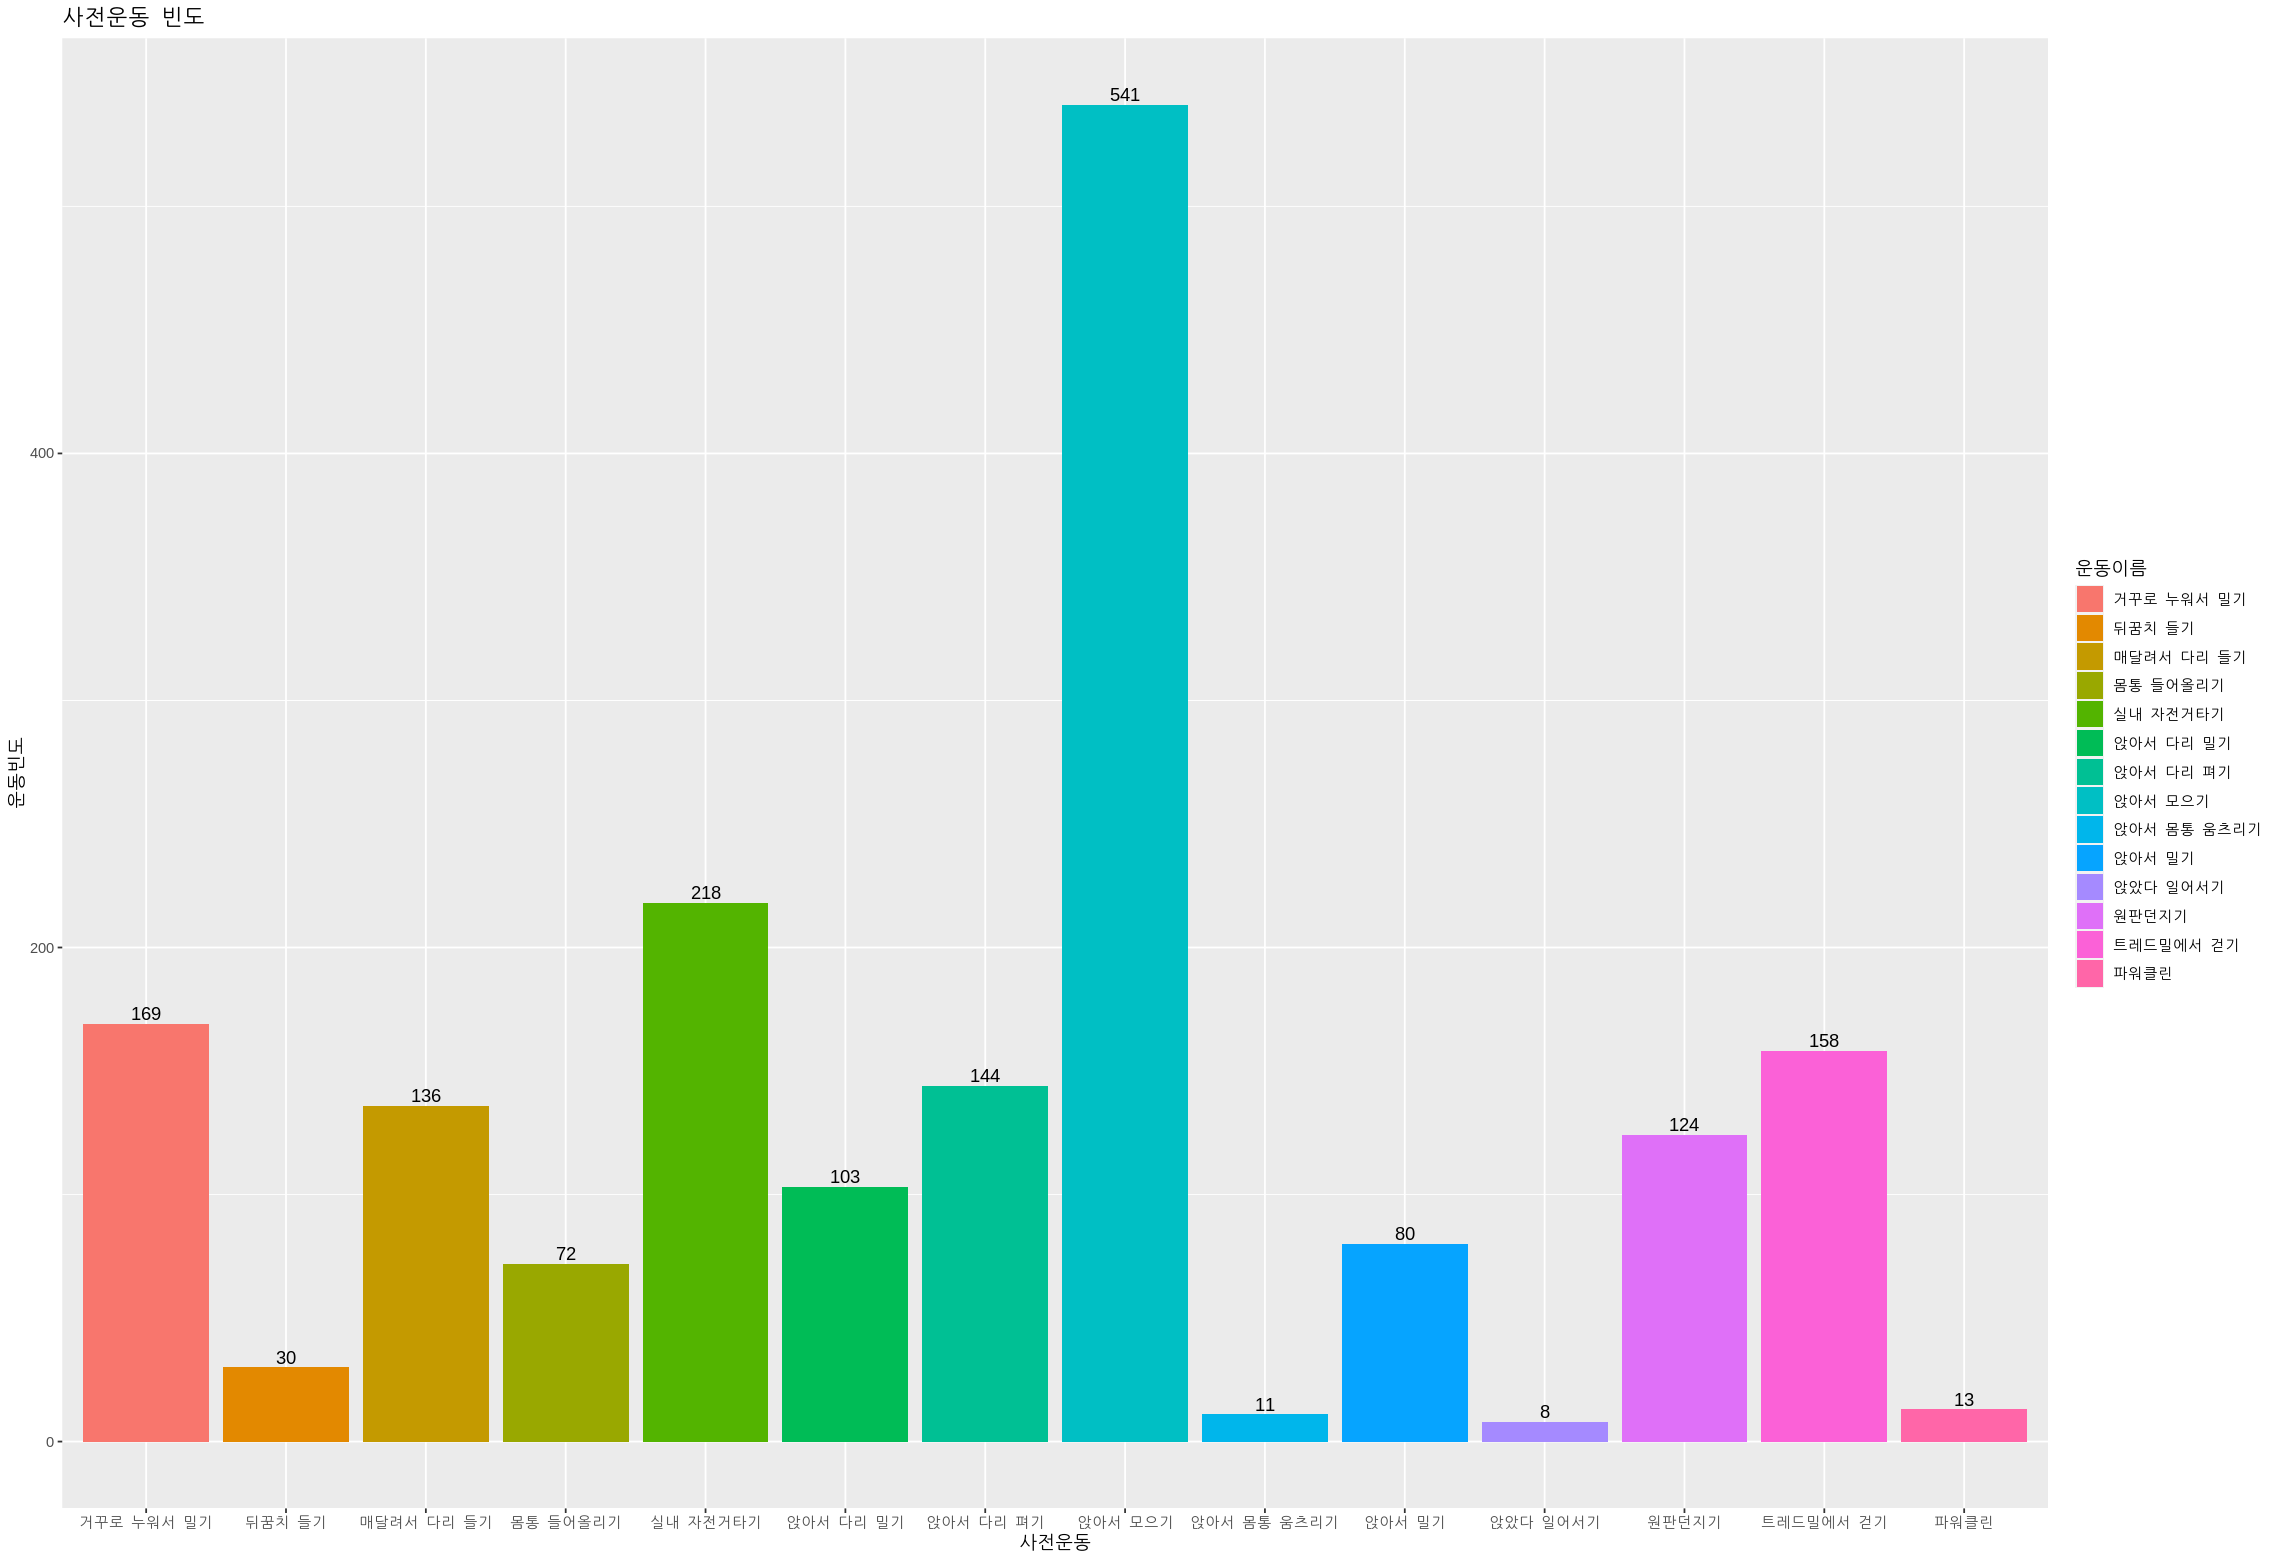

In [ ]:
# 만약 정렬하고 싶으면 aes x에 reorder(운동이름, n)으로 바꾸기
ggplot(before1,aes(x = 운동이름 , y = n,fill = 운동이름))+geom_bar(stat="identity")+geom_text(aes(label = n),vjust = -0.3)+ggtitle("사전운동 빈도")+xlab("사전운동")+ylab("운동빈도")

##### 본운동 빈도

In [ ]:
main1 <- ACCTO_합 %>% select(운동구분, 운동이름) %>% filter(운동구분 == "본운동")%>% group_by(운동이름)%>% summarise(n = n()) %>% arrange(desc(n));main1

운동이름,n
<chr>,<int>
앉아서 위로 밀기,676
서서 어깨 들어올리기,290
앉아서 다리 모으기,214
누워서 밀기,156
발 닿기,140
한발 앞으로 내밀고 앉았다 일어서기,115
바벨 끌어당기기,107
턱걸이,101
허리 굽혀 덤벨 들기,93


- 본운동별 빈도

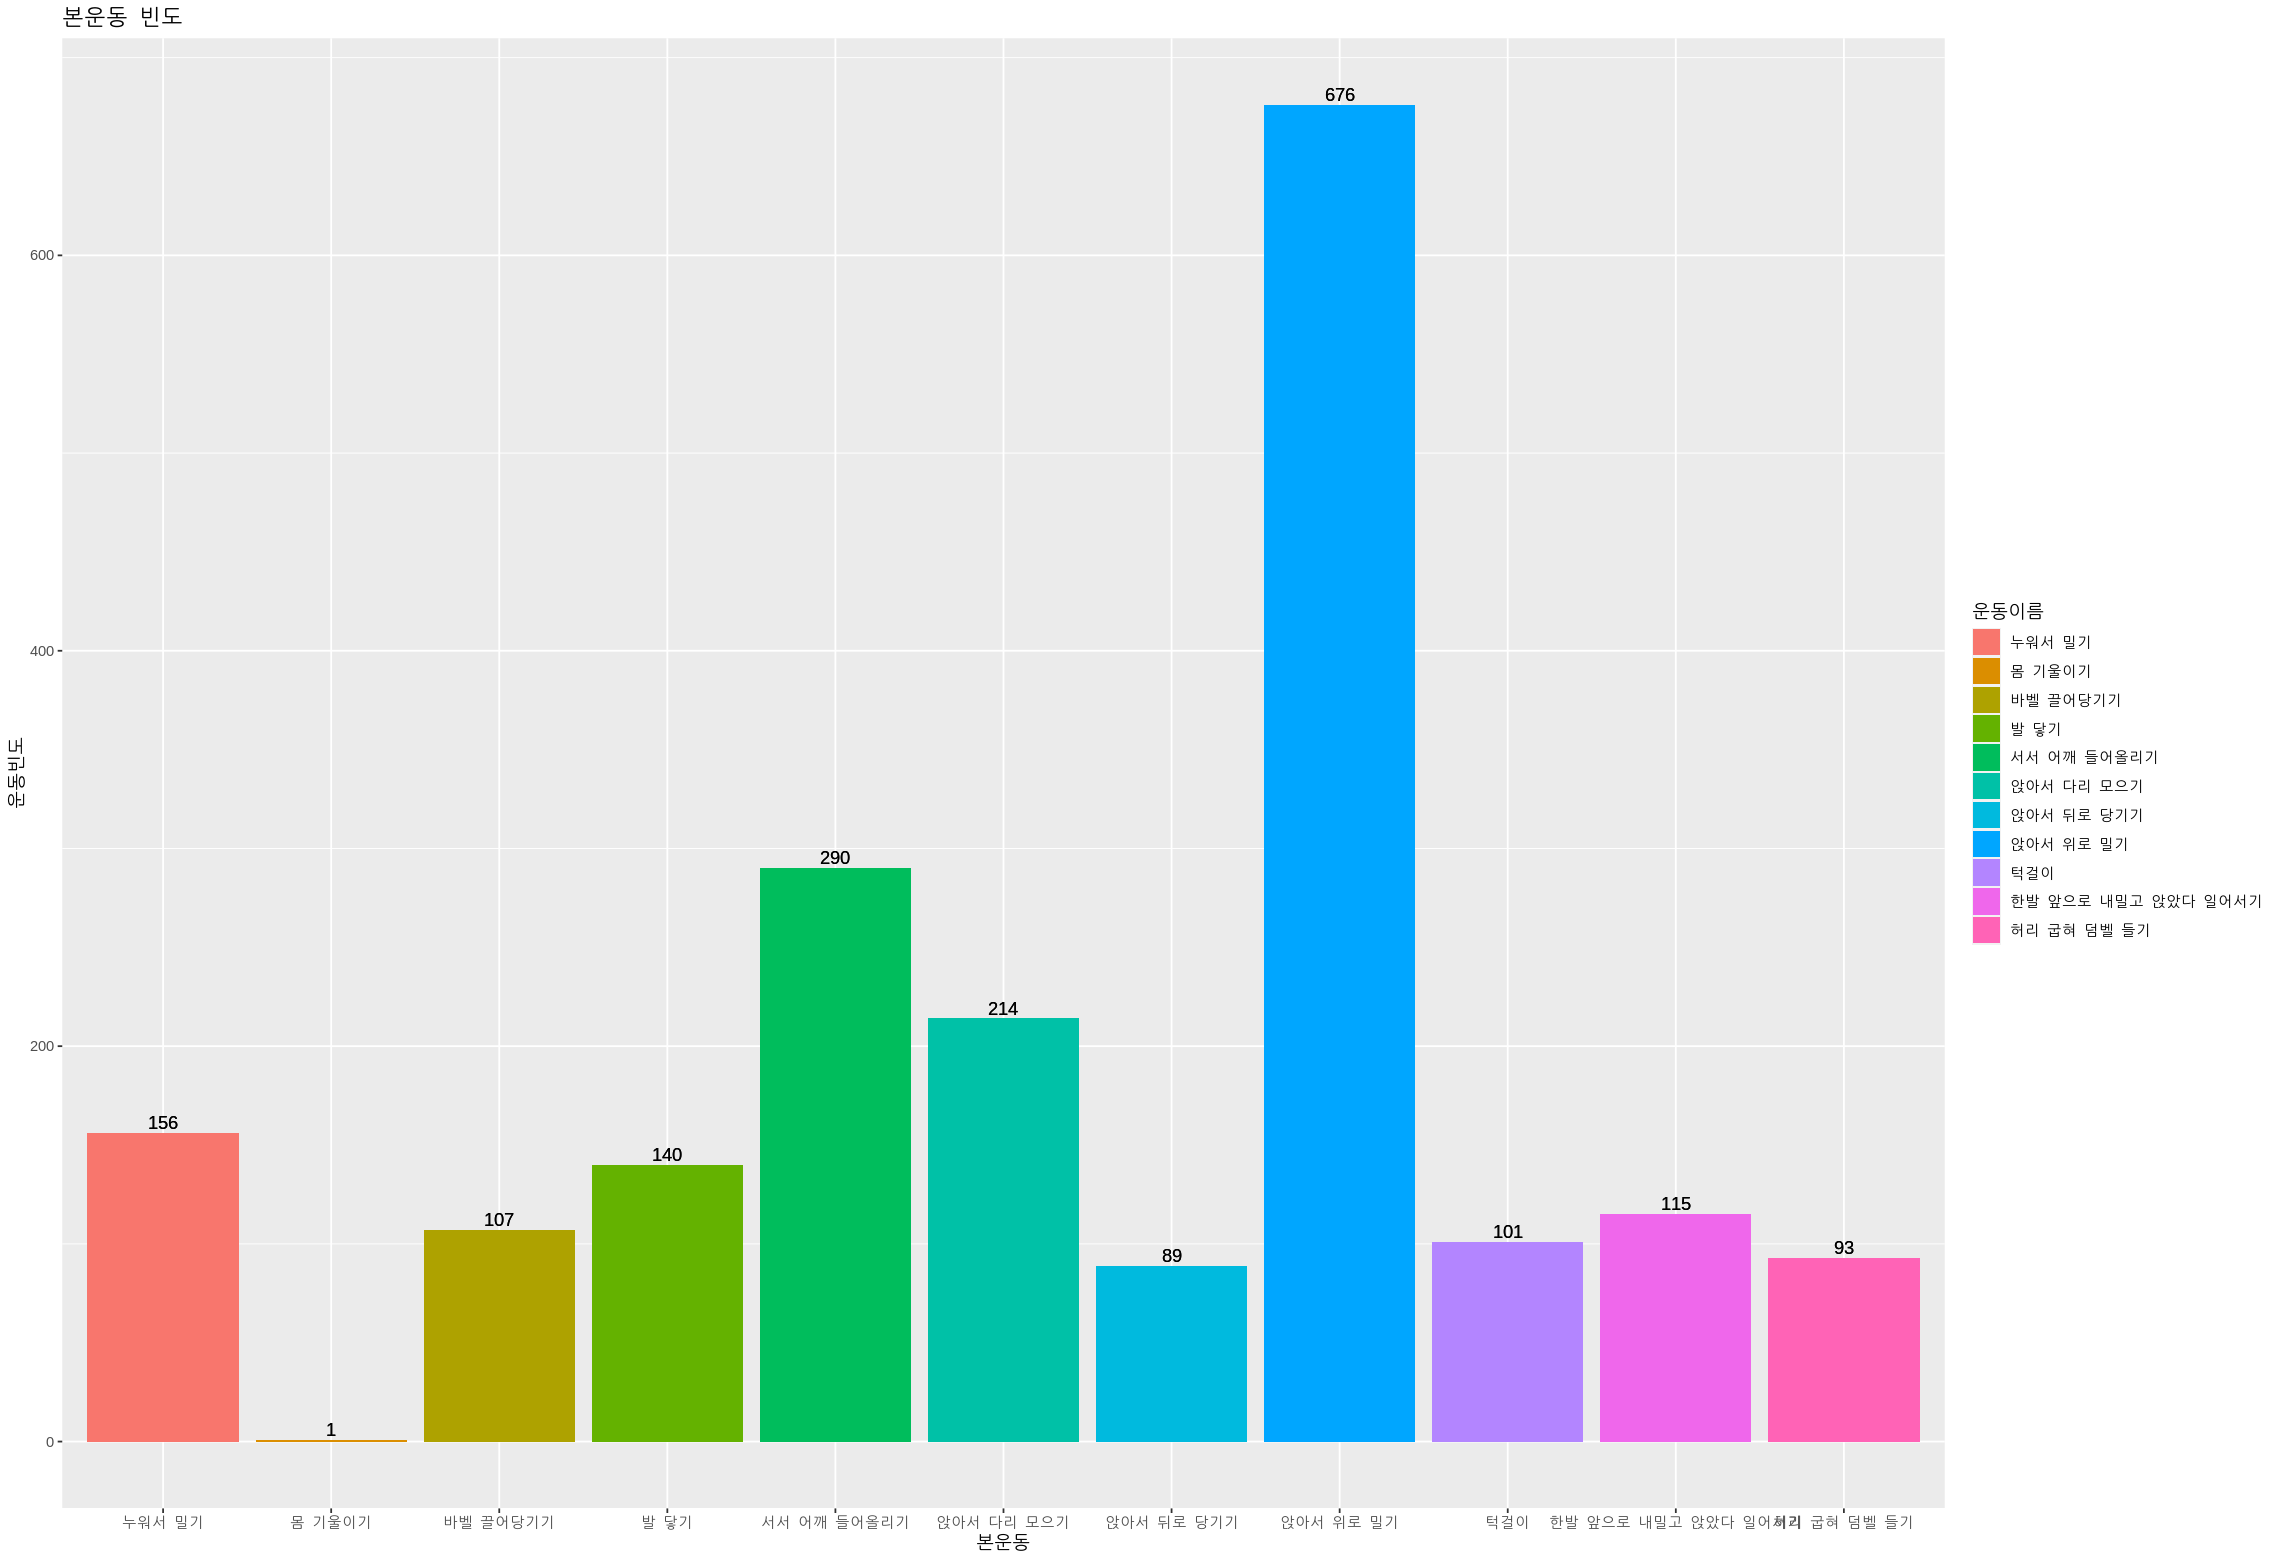

In [ ]:
ggplot(main1,aes(x = 운동이름 , y = n,fill = 운동이름))+geom_bar(,stat="identity")+geom_text(aes(label = n),vjust = -0.3)+ggtitle("본운동 빈도")+xlab("본운동")+ylab("운동빈도")+geom_text(aes(label = n),vjust = -0.3)

##### 마무리운동 빈도

In [ ]:
last1 <- ACCTO_합 %>% select(운동구분, 운동이름) %>% filter(운동구분 == "마무리운동")%>% group_by(운동이름)%>% summarise(n = n()) %>% arrange(desc(n));last1

운동이름,n
<chr>,<int>
앉아서 위로 밀기,676
서서 어깨 들어올리기,290
앉아서 다리 모으기,214
누워서 밀기,156
발 닿기,140
한발 앞으로 내밀고 앉았다 일어서기,115
바벨 끌어당기기,107
턱걸이,101
허리 굽혀 덤벨 들기,93


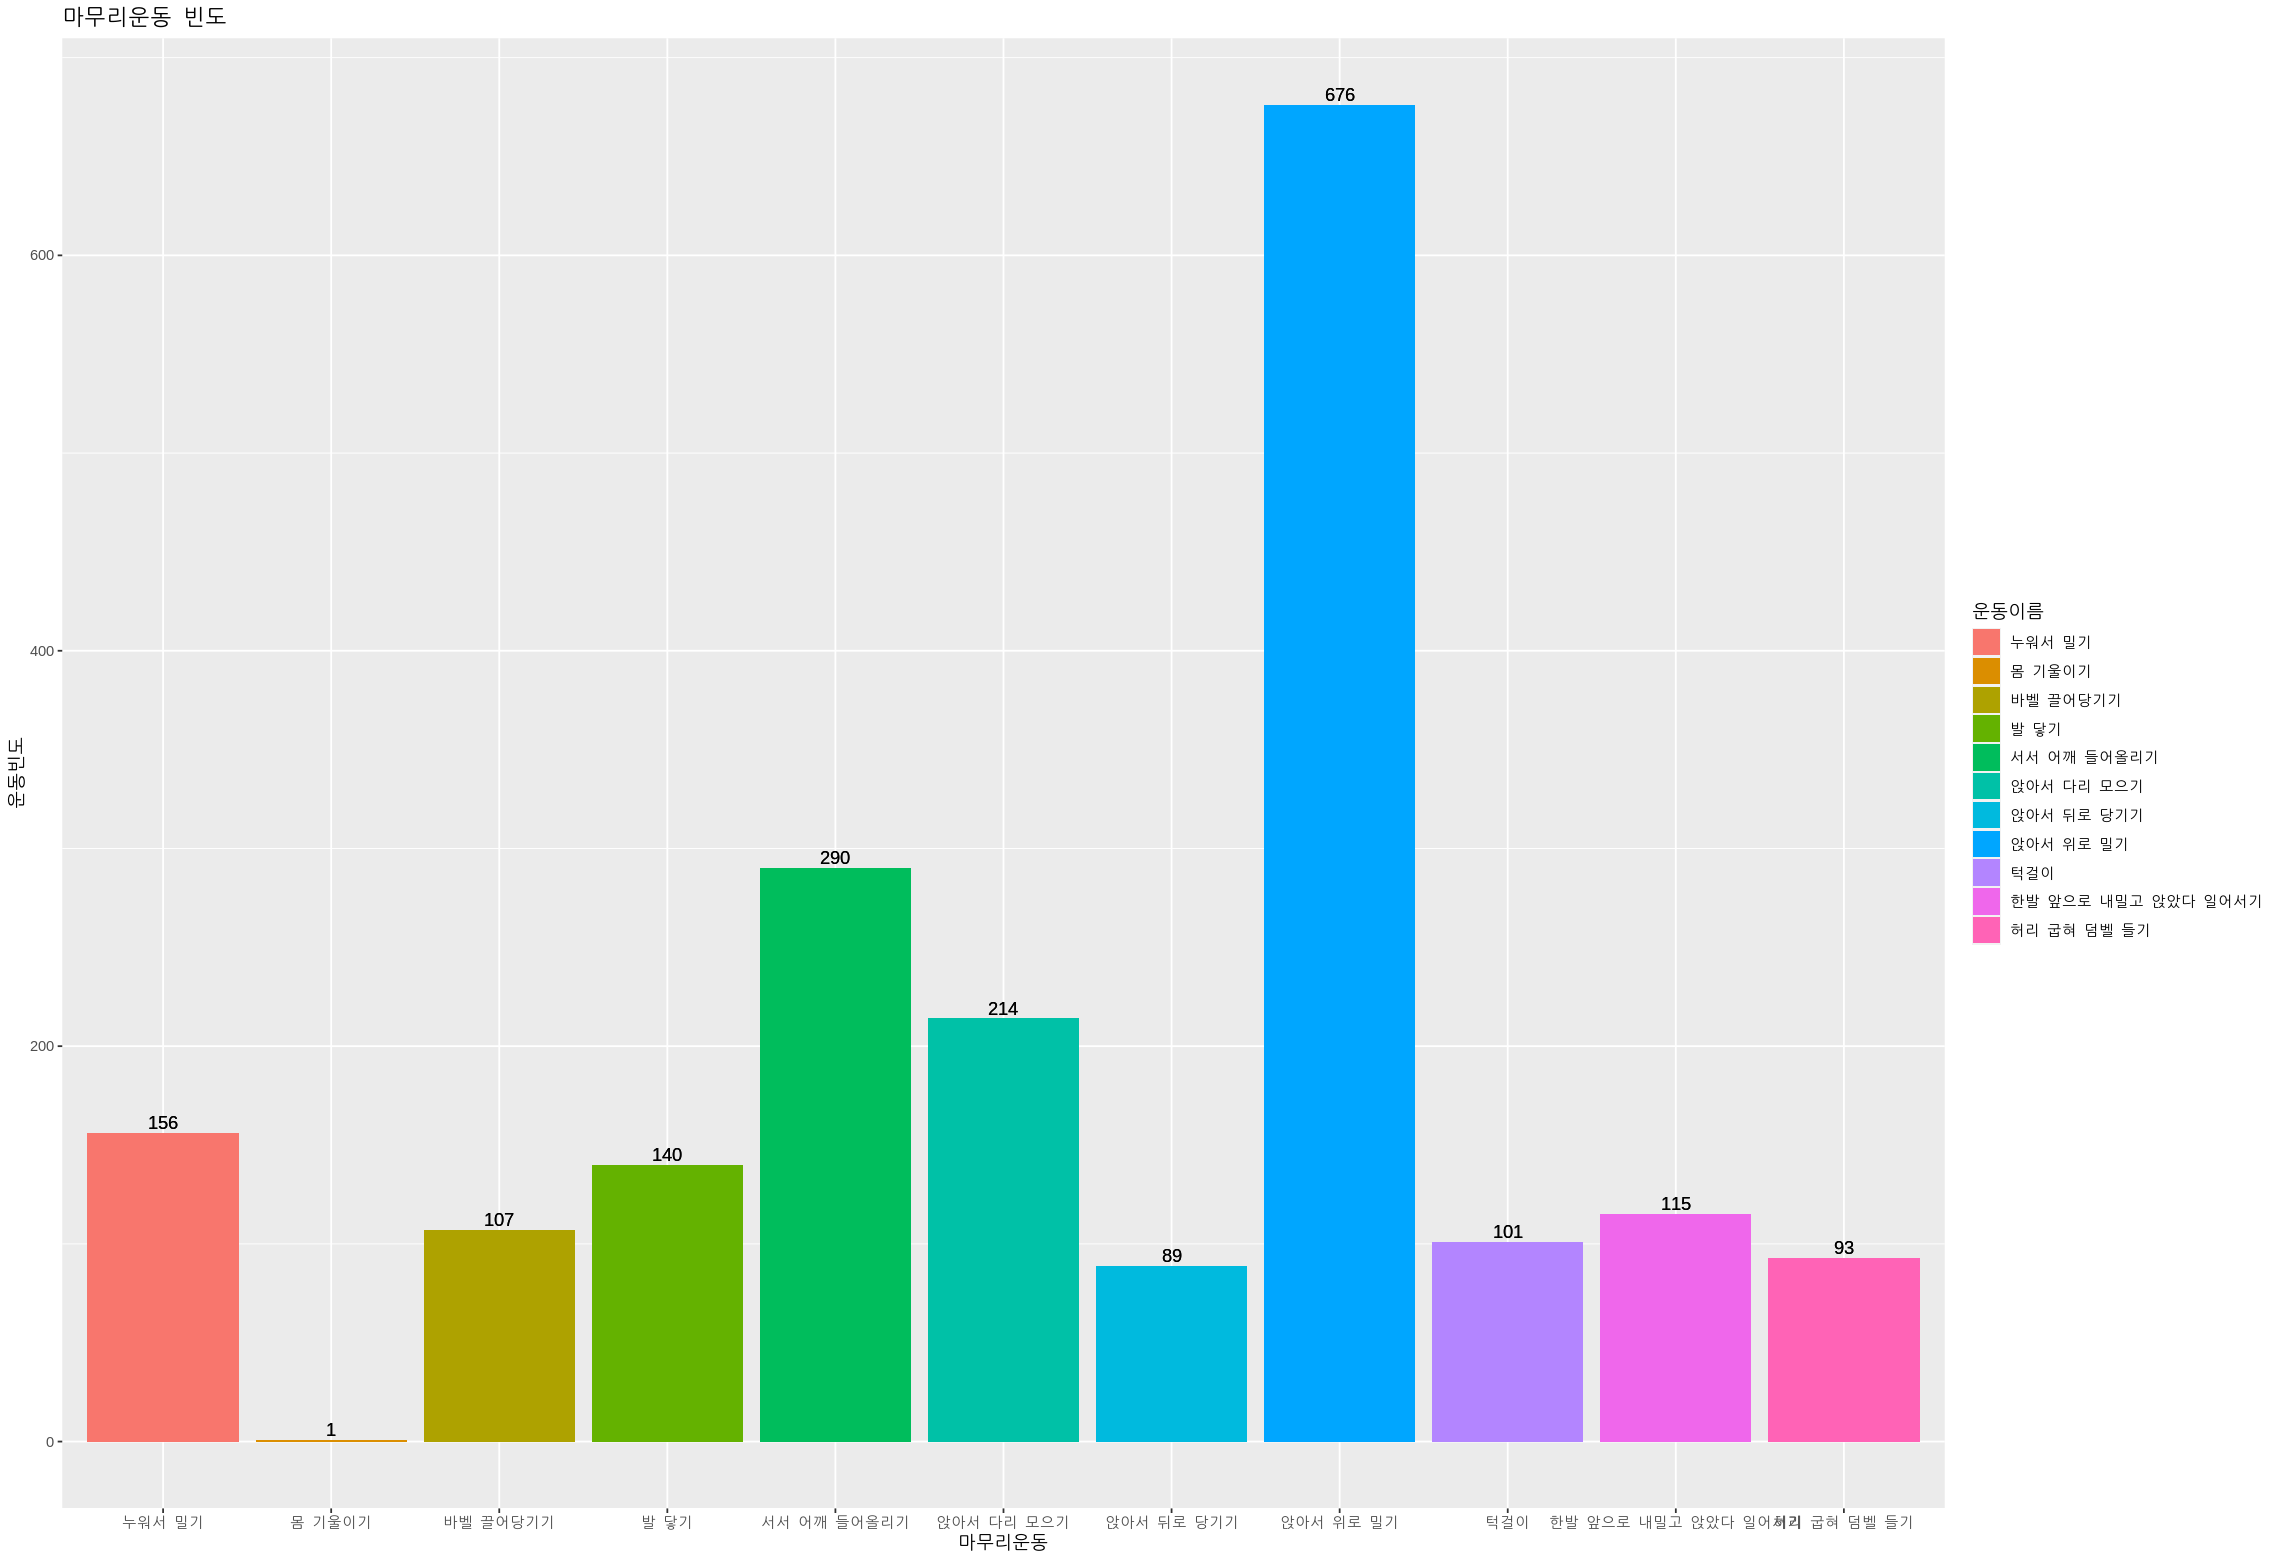

In [ ]:
ggplot(last1,aes(x = 운동이름 , y = n,fill = 운동이름))+geom_bar(,stat="identity")+geom_text(aes(label = n),vjust = -0.3)+ggtitle("마무리운동 빈도")+xlab("마무리운동")+ylab("운동빈도")+geom_text(aes(label = n),vjust = -0.3)

### Visualization

In [ ]:
library(ggplot2)

In [ ]:
hist1<-ACCTO_합%>%select(ID,SEXDSTN_FLAG_CD,TROBL_TY_NM,TROBL_GRAD_NM,운동구분,운동이름)%>% filter(운동구분 == "사전운동")%>%group_by(SEXDSTN_FLAG_CD,TROBL_TY_NM,TROBL_GRAD_NM,운동구분,운동이름)%>%summarise(n = n())%>%arrange(desc(n))

`summarise()` has grouped output by 'SEXDSTN_FLAG_CD', 'TROBL_TY_NM',
'TROBL_GRAD_NM', '운동구분'. You can override using the `.groups` argument.


-  sankey plot

In [ ]:
library(ggsankey)

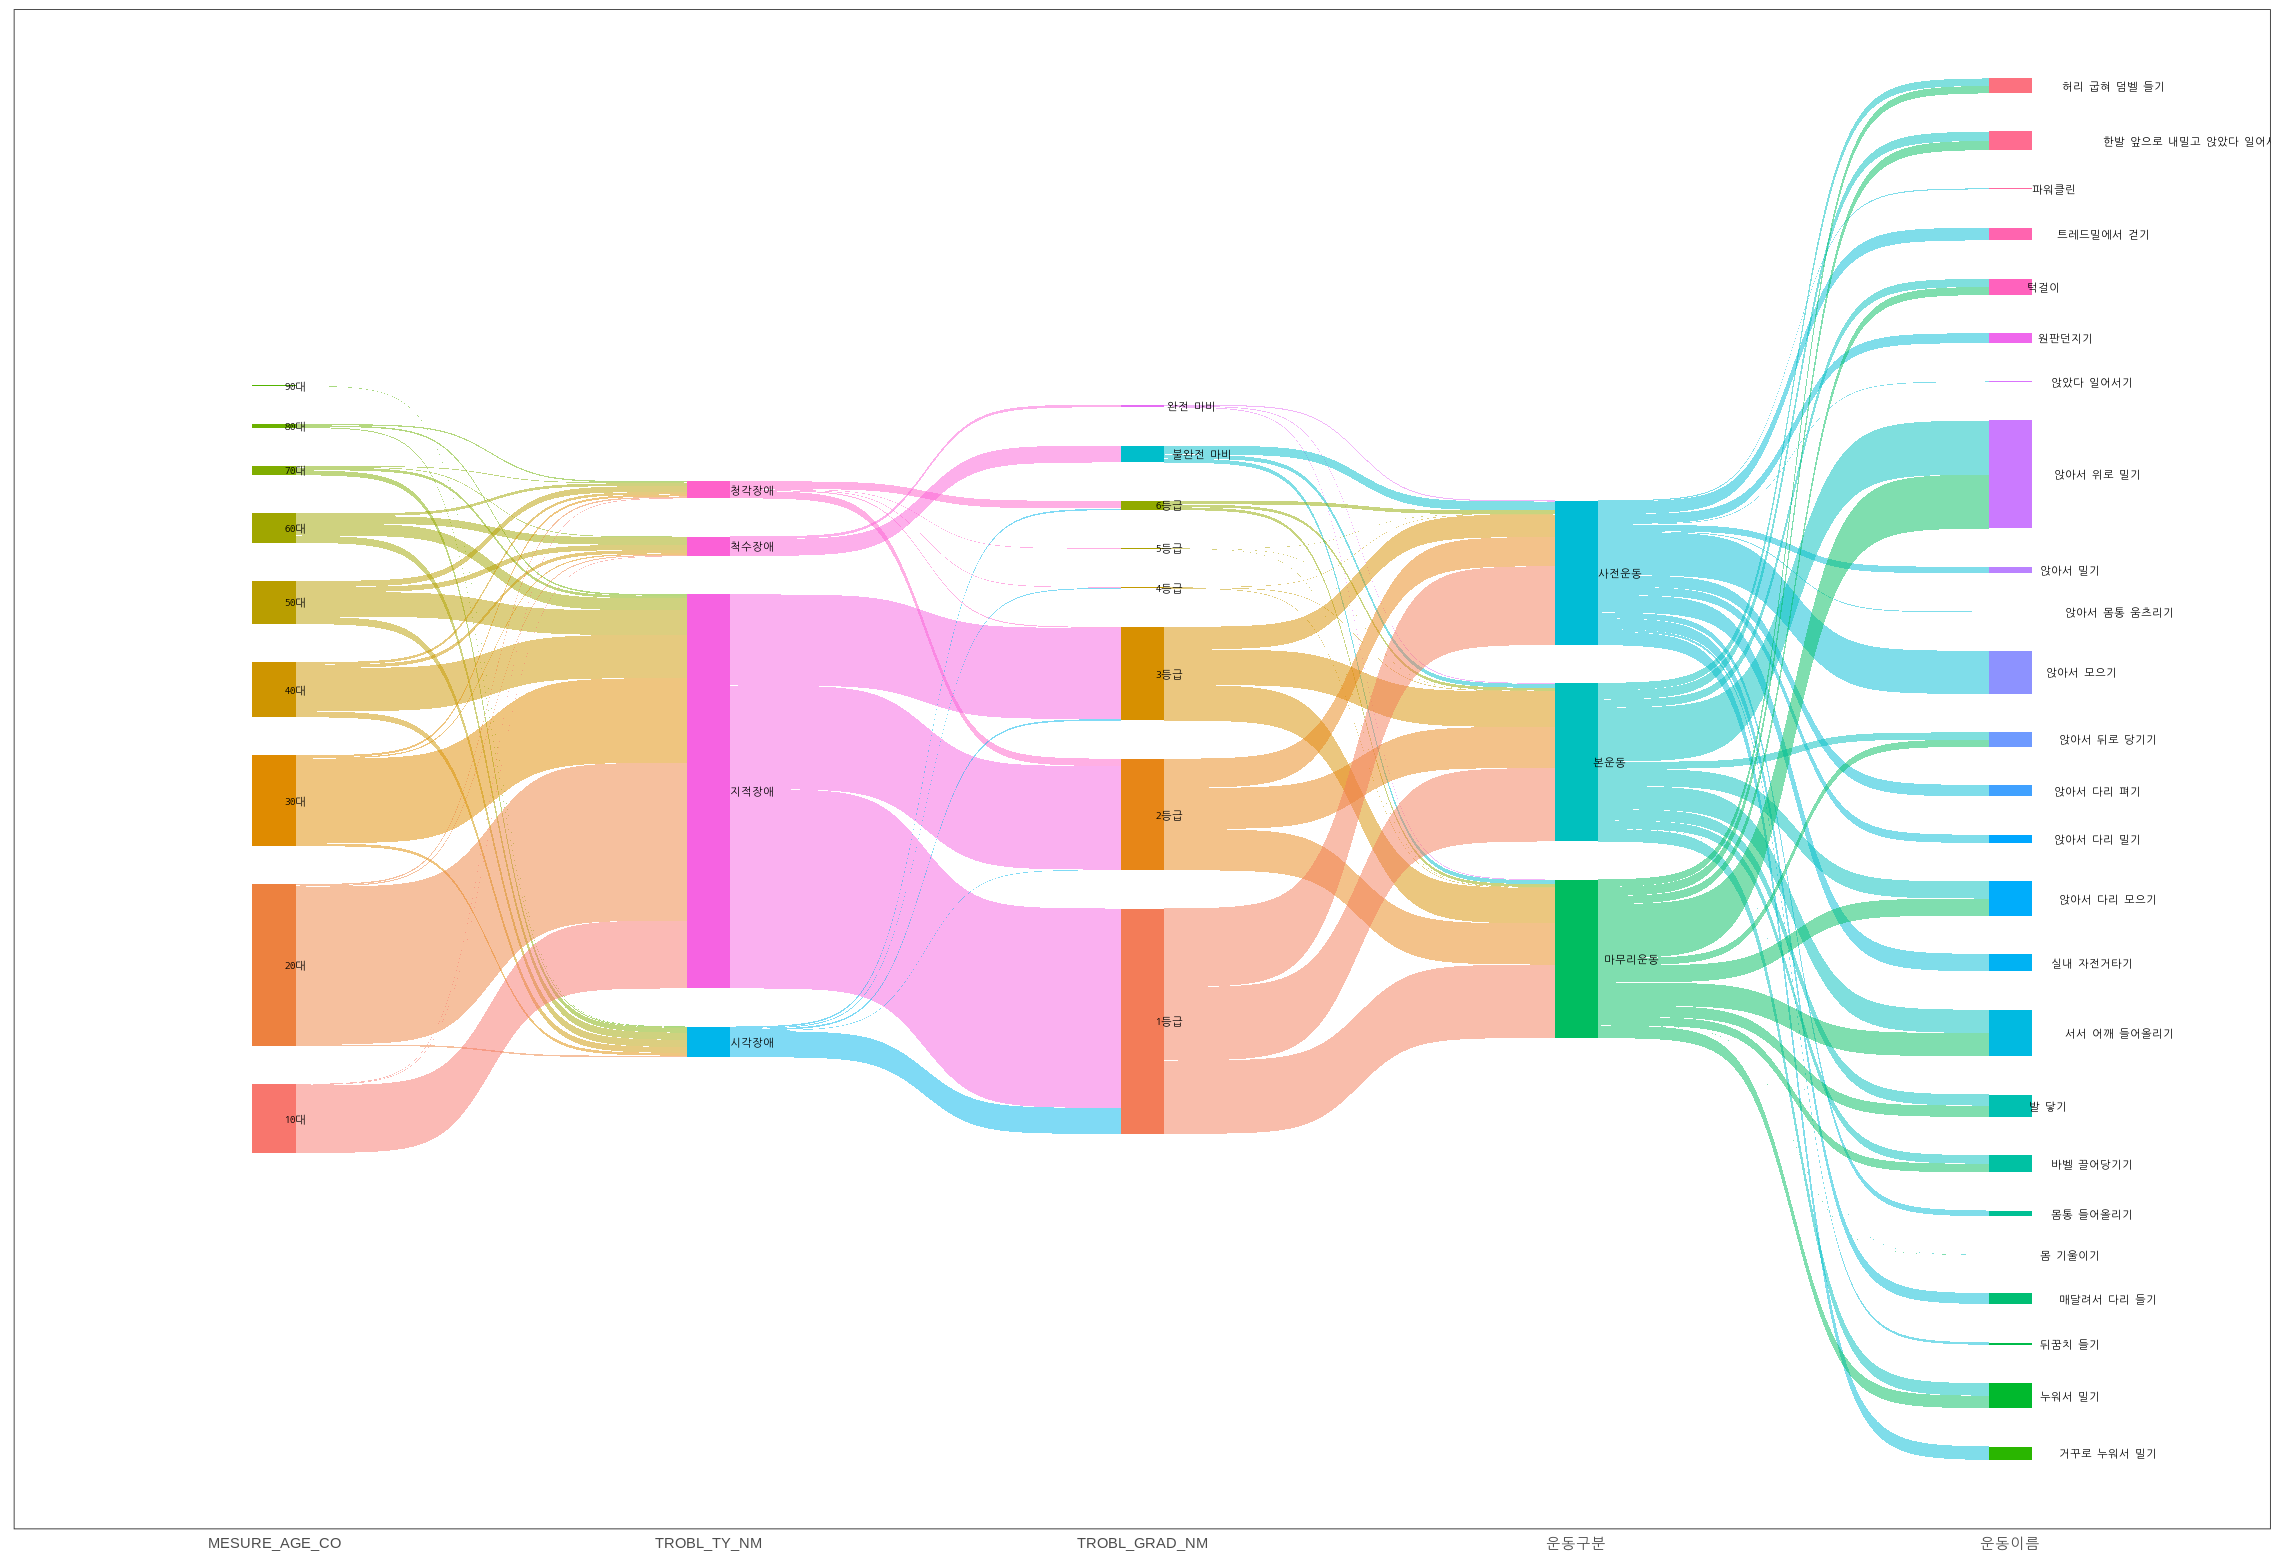

In [ ]:
#s<-ACCTO_합%>%filter(운동구분 == "마무리운동")%>%make_long(MESURE_AGE_CO,TROBL_TY_NM,TROBL_GRAD_NM,운동이름)
s<-ACCTO_합%>%make_long(MESURE_AGE_CO,TROBL_TY_NM,TROBL_GRAD_NM,운동구분,운동이름)
#s<-ACCTO_합%>%make_long(SEXDSTN_FLAG_CD,운동이름)
pl<-ggplot(s,aes(x = x, next_x = next_x, node = node,next_node = next_node,fill = factor(node), label = node))+theme_bw()+geom_sankey(flow.alpha = 0.5,show.legend = TRUE)+ theme(legend.position = "none")+geom_sankey_text(size = 2.3, hjust = -0.5)

pl <- pl +  theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())
pl
